# MovieLens 100K Data Exploration
## Initial Data Analysis and Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully")

Libraries imported successfully


In [2]:
# Define file paths
DATA_PATH = "../data/raw/"

# File configurations with proper separators and encoding
FILE_CONFIGS = {
    'ratings': {
        'file': 'u.data',
        'sep': '\t',
        'names': ['user_id', 'item_id', 'rating', 'timestamp']
    },
    'movies': {
        'file': 'u.item',
        'sep': '|',
        'encoding': 'latin-1',
        'names': ['movie_id', 'title', 'release_date', 'video_release_date', 
                  'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation',
                  'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
                  'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                  'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    },
    'users': {
        'file': 'u.user',
        'sep': '|',
        'names': ['user_id', 'age', 'gender', 'occupation', 'zip_code']
    }
}

print("Configuration loaded")

Configuration loaded


## 1. Data Loading
Load all three main data files and examine their structure.

In [3]:
def load_movielens_file(key):
    cfg = FILE_CONFIGS[key]
    path = DATA_PATH + cfg["file"]
    df = pd.read_csv(
        path,
        sep=cfg["sep"],
        names=cfg.get("names"),
        encoding=cfg.get("encoding", "utf-8"),
        header=None,
    )
    print(f"{key}: {df.shape[0]:,} rows, {df.shape[1]} cols")
    return df

# load
ratings_df = load_movielens_file("ratings")
movies_df = load_movielens_file("movies")
users_df = load_movielens_file("users")

ratings: 100,000 rows, 4 cols
movies: 1,682 rows, 24 cols
users: 943 rows, 5 cols


In [4]:
# rename 'item_id' to 'movie_id'
ratings_df = ratings_df.rename(columns={'item_id': 'movie_id'})

# basic cleaning
ratings_df = ratings_df.drop(columns=["timestamp"])
users_df = users_df.drop(columns=["zip_code"])

movies_df["release_date"] = pd.to_datetime(movies_df["release_date"], errors="coerce")
movies_df = movies_df.drop(columns=["video_release_date"])
print("Data ready")

Data ready


In [5]:
print("\n" + "="*50)
print("RATINGS DATA")
print("="*50)
print(f"Shape: {ratings_df.shape}")
print("\nFirst 5 rows:")
ratings_df.head()


RATINGS DATA
Shape: (100000, 3)

First 5 rows:


,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [6]:
print("\n" + "="*50)
print("MOVIES DATA")
print("="*50)
print(f"Shape: {movies_df.shape}")
print("\nFirst 5 movies:")
movies_df.head()


MOVIES DATA
Shape: (1682, 23)

First 5 movies:


,movie_id,title,release_date,imdb_url,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
print("\nGenre columns:")
genre_cols = [col for col in movies_df.columns if col not in 
              ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']]
genre_cols


Genre columns:


['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [8]:
print("\n" + "="*50)
print("USERS DATA")
print("="*50)
print(f"Shape: {users_df.shape}")
print("\nFirst 5 users:")
users_df.head()


USERS DATA
Shape: (943, 4)

First 5 users:


,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [9]:
print("\nUnique values per column:")
for col in users_df.columns:
    n_unique = users_df[col].nunique()
    print(f"{col}: {n_unique} unique values")


Unique values per column:
user_id: 943 unique values
age: 61 unique values
gender: 2 unique values
occupation: 21 unique values


In [10]:

print("\nUnique values per column:")
for col in ratings_df.columns:
    n_unique = ratings_df[col].nunique()
    print(f"{col}: {n_unique} unique values")


Unique values per column:
user_id: 943 unique values
movie_id: 1682 unique values
rating: 5 unique values


## 2. Data Quality Assessment
Check for missing values, duplicates, and data consistency issues.

In [11]:
# --- Clean movies & ratings before quality checks ---

# unify duplicate titles to a single movie_id
movies_df['primary_movie_id'] = (
    movies_df.groupby('title')['movie_id'].transform('min')  # pick smallest ID per title
)
id_map = dict(zip(movies_df['movie_id'], movies_df['primary_movie_id']))

# map all ratings to the primary movie_id
ratings_df['movie_id'] = ratings_df['movie_id'].map(id_map)

# if same user rated duplicate entries of the same movie, average those ratings
ratings_df = (
    ratings_df
    .groupby(['user_id', 'movie_id'], as_index=False)['rating']
    .mean()
)

# keep a single movie row per title
movies_df = (
    movies_df
    .drop(columns='primary_movie_id')
    .drop_duplicates(subset='title', keep='first')
)

# drop movies with missing key info and ratings that point to them
movies_df = movies_df.dropna(subset=['release_date', 'imdb_url'])
ratings_df = ratings_df[ratings_df['movie_id'].isin(movies_df['movie_id'])].copy()

In [12]:
def assess_data_quality(df, name):
    print(f"\n{'='*50}\nDATA QUALITY CHECK: {name}\n{'='*50}")

    # nulls
    nulls = df.isna().sum()
    print("\nMissing values:")
    print(nulls[nulls > 0] if nulls.any() else "✓ None")

    # duplicates
    if set(['user_id','movie_id']).issubset(df.columns):
        dup = df.duplicated(subset=['user_id','movie_id']).sum()
        print(f"\nDuplicate user-movie ratings: {dup}")
    else:
        dup = df.duplicated().sum()
        print(f"\nDuplicate full rows: {dup}")

    # for movies
    if name == "Movies":
        title_dupes = df.groupby('title')['movie_id'].nunique()
        multi_ids = title_dupes[title_dupes > 1]
        print(f"\nMovie titles mapped to multiple IDs: {len(multi_ids)}")
        if len(multi_ids) > 0:
            print(multi_ids.head())

    print(f"\nMemory: {df.memory_usage(deep=True).sum()/1024**2:.2f} MB")

    return {"nulls": nulls.sum(), "duplicates": dup}

# assess all datasets
quality_ratings = assess_data_quality(ratings_df, "Ratings")
quality_movies = assess_data_quality(movies_df, "Movies")
quality_users = assess_data_quality(users_df, "Users")


DATA QUALITY CHECK: Ratings

Missing values:
✓ None

Duplicate user-movie ratings: 0

Memory: 3.04 MB

DATA QUALITY CHECK: Movies

Missing values:
✓ None

Duplicate full rows: 0

Movie titles mapped to multiple IDs: 0

Memory: 0.57 MB

DATA QUALITY CHECK: Users

Missing values:
✓ None

Duplicate full rows: 0

Memory: 0.11 MB


In [13]:
print("\nDATA SHAPE:")
print(f"ratings: {ratings_df.shape[0]:,} rows, {ratings_df.shape[1]} cols")
print(f"movies:  {movies_df.shape[0]:,} rows, {movies_df.shape[1]} cols")
print(f"users:   {users_df.shape[0]:,} rows, {users_df.shape[1]} cols")


DATA SHAPE:
ratings: 99,680 rows, 3 cols
movies:  1,661 rows, 23 cols
users:   943 rows, 4 cols


## 3. Statistical Analysis
Analyze distributions and patterns in the data.

In [14]:
print("\n" + "="*50)
print("RATING STATISTICS")
print("="*50)

# Overall rating statistics
print("\nOverall Rating Distribution:")
print(ratings_df['rating'].value_counts().sort_index())
print(f"\nMean rating: {ratings_df['rating'].mean():.2f}")
print(f"Median rating: {ratings_df['rating'].median():.1f}")
print(f"Std deviation: {ratings_df['rating'].std():.2f}")

# User activity statistics
user_stats = ratings_df.groupby('user_id').agg({
    'rating': ['count', 'mean', 'std'],
    'movie_id': 'nunique'
}).round(2)
user_stats.columns = ['n_ratings', 'avg_rating', 'std_rating', 'n_movies']

print("\n" + "="*50)
print("USER ACTIVITY STATISTICS")
print("="*50)
print(user_stats.describe())

# Movie popularity statistics
movie_stats = ratings_df.groupby('movie_id').agg({
    'rating': ['count', 'mean', 'std'],
    'user_id': 'nunique'
}).round(2)
movie_stats.columns = ['n_ratings', 'avg_rating', 'std_rating', 'n_users']

print("\n" + "="*50)
print("MOVIE POPULARITY STATISTICS")
print("="*50)
print(movie_stats.describe())


RATING STATISTICS

Overall Rating Distribution:
rating
1.0     6079
1.5        3
2.0    11334
2.5        6
3.0    27057
3.5       19
4.0    34038
4.5       16
5.0    21128
Name: count, dtype: int64

Mean rating: 3.53
Median rating: 4.0
Std deviation: 1.13

USER ACTIVITY STATISTICS
        n_ratings  avg_rating  std_rating    n_movies
count  943.000000  943.000000  943.000000  943.000000
mean   105.705196    3.588187    1.019841  105.705196
std    100.596723    0.444481    0.205099  100.596723
min     19.000000    1.500000    0.340000   19.000000
25%     33.000000    3.320000    0.880000   33.000000
50%     64.000000    3.620000    1.010000   64.000000
75%    147.500000    3.860000    1.140000  147.500000
max    735.000000    4.870000    1.750000  735.000000

MOVIE POPULARITY STATISTICS
         n_ratings   avg_rating   std_rating      n_users
count  1661.000000  1661.000000  1526.000000  1661.000000
mean     60.012041     3.078170     1.054607    60.012041
std      80.717340     0.779

## 4. Data Visualizations
Create visualizations to better understand the data patterns.

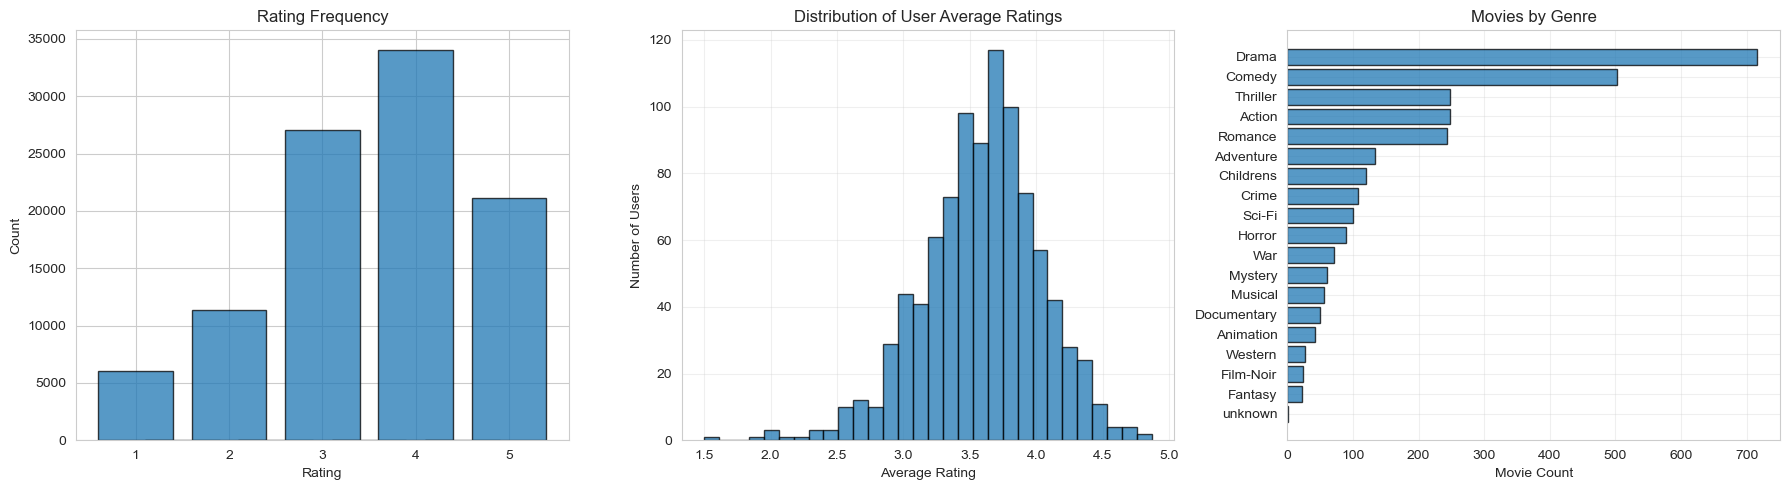

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1) Rating distribution 
rating_counts = ratings_df['rating'].value_counts().sort_index()

axes[0].bar(rating_counts.index,
            rating_counts.values,
            edgecolor='black', alpha=0.75)

axes[0].set_title("Rating Frequency")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")

# 2) User Average Rating Distribution
axes[1].hist(user_stats['avg_rating'], bins=30,
             edgecolor='black', alpha=0.75)

axes[1].set_title("Distribution of User Average Ratings")
axes[1].set_xlabel("Average Rating")
axes[1].set_ylabel("Number of Users")
axes[1].grid(alpha=0.3)


# 3) Number of Movies per Genre
genre_cols = [
    'unknown','Action','Adventure','Animation','Childrens','Comedy','Crime',
    'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical',
    'Mystery','Romance','Sci-Fi','Thriller','War','Western'
]

genre_counts = movies_df[genre_cols].sum().sort_values()

axes[2].barh(genre_counts.index,
             genre_counts.values,
             edgecolor='black', alpha=0.75)

axes[2].set_title("Movies by Genre")
axes[2].set_xlabel("Movie Count")
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [16]:
# Calculate genre frequencies
genre_counts = movies_df[genre_cols].sum().sort_values(ascending=True)

print("\nGenre Statistics:")
print(f"Total movies: {len(movies_df)}")
print(f"Movies per genre (avg): {genre_counts.mean():.1f}")
print(f"Most common genre: {genre_counts.idxmax()} ({genre_counts.max()} movies)")
print(f"Least common genre: {genre_counts.idxmin()} ({genre_counts.min()} movies)")


Genre Statistics:
Total movies: 1661
Movies per genre (avg): 150.5
Most common genre: Drama (715 movies)
Least common genre: unknown (1 movies)


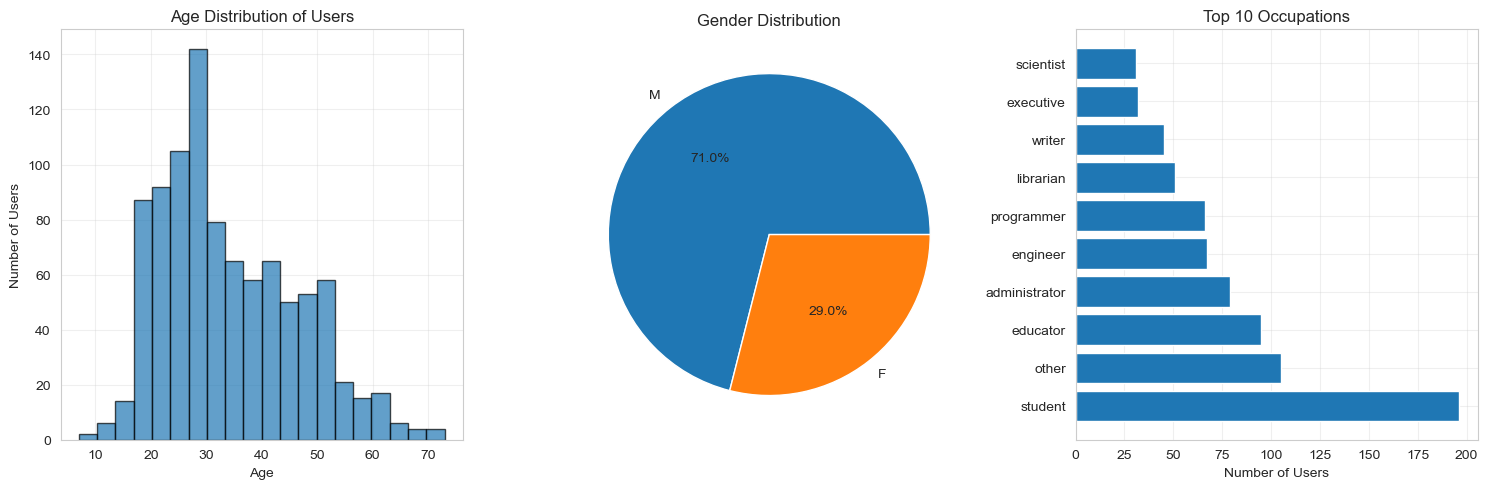

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Age distribution
axes[0].hist(users_df['age'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of Users')
axes[0].set_title('Age Distribution of Users')
axes[0].grid(True, alpha=0.3)

# Gender distribution
gender_counts = users_df['gender'].value_counts()
axes[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axes[1].set_title('Gender Distribution')

# Top occupations
top_occupations = users_df['occupation'].value_counts().head(10)
axes[2].barh(range(len(top_occupations)), top_occupations.values)
axes[2].set_yticks(range(len(top_occupations)))
axes[2].set_yticklabels(top_occupations.index)
axes[2].set_xlabel('Number of Users')
axes[2].set_title('Top 10 Occupations')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
print("\n" + "="*50)
print("POWER USERS (Top 10 Most Active)")
print("="*50)

top_users = user_stats.nlargest(10, 'n_ratings')[['n_ratings', 'avg_rating']]
print(top_users)

print("\n" + "="*50)
print("MOST POPULAR MOVIES (Top 10)")
print("="*50)

# Get movie titles for popular movies
popular_movies = movie_stats.nlargest(10, 'n_ratings')
popular_movies_with_titles = popular_movies.merge(
    movies_df[['movie_id', 'title']], 
    left_index=True, 
    right_on='movie_id'
)[['title', 'n_ratings', 'avg_rating']]
print(popular_movies_with_titles.to_string())


POWER USERS (Top 10 Most Active)
         n_ratings  avg_rating
user_id                       
405            735        1.84
655            678        2.90
13             632        3.10
450            538        3.86
276            516        3.47
537            489        2.87
416            487        3.85
303            483        3.36
234            478        3.13
393            447        3.34

MOST POPULAR MOVIES (Top 10)
                             title  n_ratings  avg_rating
49                Star Wars (1977)        583        4.36
257                 Contact (1997)        509        3.80
99                    Fargo (1996)        508        4.16
180      Return of the Jedi (1983)        507        4.01
293               Liar Liar (1997)        485        3.16
285    English Patient, The (1996)        481        3.66
287                  Scream (1996)        478        3.44
0                 Toy Story (1995)        452        3.88
299           Air Force One (1997)        

In [19]:
print("\n" + "="*50)
print("SPARSITY ANALYSIS")
print("="*50)

n_users = users_df['user_id'].nunique()
n_movies = movies_df['movie_id'].nunique()
n_possible_ratings = n_users * n_movies
n_actual_ratings = len(ratings_df)
sparsity = 1 - (n_actual_ratings / n_possible_ratings)

print(f"Number of users: {n_users:,}")
print(f"Number of movies: {n_movies:,}")
print(f"Possible ratings: {n_possible_ratings:,}")
print(f"Actual ratings: {n_actual_ratings:,}")
print(f"Sparsity: {sparsity:.2%}")
print(f"Density: {(1-sparsity):.2%}")


SPARSITY ANALYSIS
Number of users: 943
Number of movies: 1,661
Possible ratings: 1,566,323
Actual ratings: 99,680
Sparsity: 93.64%
Density: 6.36%


## 5. BASIC JOINS & COMBINED VIEW

In [20]:
print("\n" + "="*50)
print("BASIC JOINS & COMBINED VIEW")
print("="*50)


BASIC JOINS & COMBINED VIEW


In [21]:
# --- 5.1 Join ratings + users ---
ratings_users = ratings_df.merge(users_df, on="user_id")
print("\nFirst 5 rows (ratings + users):")
display(ratings_users.head())

print("\nAverage rating by gender:")
display(ratings_users.groupby("gender")["rating"].mean())

print("\nAverage rating by occupation (top 10):")
display(ratings_users.groupby("occupation")["rating"].mean().sort_values(ascending=False).head(10))



First 5 rows (ratings + users):


,user_id,movie_id,rating,age,gender,occupation
0,1,1,5.0,24,M,technician
1,1,2,3.0,24,M,technician
2,1,3,4.0,24,M,technician
3,1,4,3.0,24,M,technician
4,1,5,3.0,24,M,technician



Average rating by gender:


gender
F    3.531600
M    3.529413
Name: rating, dtype: float64


Average rating by occupation (top 10):


occupation
none             3.777283
lawyer           3.735316
doctor           3.690167
educator         3.670791
artist           3.656223
administrator    3.635754
scientist        3.611572
salesman         3.581382
programmer       3.568071
librarian        3.559787
Name: rating, dtype: float64

In [22]:
# --- 5.2 Join ratings + movies ---
ratings_movies = ratings_df.merge(
    movies_df[["movie_id", "title"] + genre_cols],
    on="movie_id"
)
print("\nFirst 5 rows (ratings + movies):")
display(ratings_movies.head())

print("\nTop 10 movies by average rating:")
top10_movies = (
    ratings_movies.groupby("title")["rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
display(top10_movies)


First 5 rows (ratings + movies):


,user_id,movie_id,rating,title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,5.0,Toy Story (1995),0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2,3.0,GoldenEye (1995),0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,4.0,Four Rooms (1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,4,3.0,Get Shorty (1995),0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,5,3.0,Copycat (1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0



Top 10 movies by average rating:


title
Star Kid (1997)                                      5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Aiqing wansui (1994)                                 5.0
Someone Else's America (1995)                        5.0
Santa with Muscles (1996)                            5.0
Great Day in Harlem, A (1994)                        5.0
Saint of Fort Washington, The (1993)                 5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64

In [23]:
# --- 5.3 Full join: ratings + users + movies ---
full_df = (
    ratings_df
    .merge(users_df, on="user_id")
    .merge(movies_df, on="movie_id")
)

print("\nFirst 5 rows of FULL combined table:")
display(full_df.head())

print("\nShape of full combined table:", full_df.shape)


First 5 rows of FULL combined table:


,user_id,movie_id,rating,age,gender,occupation,title,release_date,imdb_url,unknown,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,5.0,24,M,technician,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,3.0,24,M,technician,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,4.0,24,M,technician,Four Rooms (1995),1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,...,0,0,0,0,0,0,0,1,0,0
3,1,4,3.0,24,M,technician,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,...,0,0,0,0,0,0,0,0,0,0
4,1,5,3.0,24,M,technician,Copycat (1995),1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,...,0,0,0,0,0,0,0,1,0,0



Shape of full combined table: (99680, 28)


In [24]:
# --- 5.4 Example EDA checks using the full combined view ---
print("\nMean rating by age group:")
full_df["age_group"] = pd.cut(full_df["age"], bins=[0,18,25,35,50,100])
display(full_df.groupby("age_group")["rating"].mean())

print("\nMean rating by gender and Drama genre:")
display(full_df.groupby(["gender", "Drama"])["rating"].mean().unstack())


Mean rating by age group:


age_group
(0, 18]      3.553244
(18, 25]     3.470300
(25, 35]     3.498299
(35, 50]     3.573035
(50, 100]    3.683303
Name: rating, dtype: float64


Mean rating by gender and Drama genre:


Drama,0,1
gender,,
F,3.434431,3.662099
M,3.423477,3.696319


In [ ]:
full_df["age_group"] = full_df["age_group"].astype(str)


# --- 5.5 Save combined table for next notebook ---
import sqlite3

conn = sqlite3.connect("../data/processed/movielens.db")

ratings_df.to_sql('ratings', conn, if_exists='replace', index=False)
movies_df.to_sql('movies', conn, if_exists='replace', index=False)
users_df.to_sql('users', conn, if_exists='replace', index=False)
full_df.to_sql("combined_raw", conn, if_exists="replace", index=False)

conn.close()

print("\nSaved tables to SQLite database: ../data/processed/movielens.db")


Saved combined_raw table to SQLite database: ../data/processed/movielens.db
